In [ ]:
%matplotlib inline
# Basic numerical package
import numpy as np
import pandas as pd
from astropy.io import fits

# Graphical packages
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from astropy.table import Table

# Package for unsupervised learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.cluster import OPTICS

# warning
import warnings

warnings.filterwarnings("ignore")

# some settings for the notebook
plt.rcParams.update({"font.size": 12})
pd.set_option("display.max_columns", 600)
sns.set_theme(style="whitegrid", font_scale=1.5, context="paper")

In [ ]:
# # Fancy figures
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

### Data Inspection and Cleaning

In [ ]:
#Importing the relevant data
sdss = Table.read('SDSS17Pipe3D_v3_1_1.fits')
df = sdss.to_pandas()
df
# df.columns

name  plate   ifudsgn        plateifu      mangaid  \
0      b'manga-10001-12701'  10001  b'12701'  b'10001-12701'   b'1-48157'   
1      b'manga-10001-12702'  10001  b'12702'  b'10001-12702'   b'1-48188'   
2      b'manga-10001-12703'  10001  b'12703'  b'10001-12703'   b'1-55648'   
3      b'manga-10001-12704'  10001  b'12704'  b'10001-12704'   b'1-55616'   
4      b'manga-10001-12705'  10001  b'12705'  b'10001-12705'   b'1-55784'   
...                     ...    ...       ...             ...          ...   
10215    b'manga-9894-6102'   9894   b'6102'    b'9894-6102'  b'1-294166'   
10216    b'manga-9894-6103'   9894   b'6103'    b'9894-6103'  b'1-294369'   
10217    b'manga-9894-6104'   9894   b'6104'    b'9894-6104'  b'1-294374'   
10218    b'manga-9894-9101'   9894   b'9101'    b'9894-9101'  b'1-294459'   
10219    b'manga-9894-9102'   9894   b'9102'    b'9894-9102'  b'1-550782'   

            objra     objdec  log_SFR_Ha       FoV     Re_kpc  e_log_Mass  \
0      133.371091  57.598425   -0.089513  5.064127   3.963157    0.101380   
1      133.685670  57.480250   -0.608526  3.730578   5.577076    0.089045   
2      136.017160  57.092329    0.100403  3.902475   5.857879    0.081200   
3      133.989967  57.677968   -0.465114  1.627717   4.571878    0.084964   
4      136.751375  57.451437    0.482523  4.555624   5.150673    0.094235   
...           ...        ...         ...       ...        ...         ...   
10215  251.741870  19.670640   -0.553936  3.452352   2.445081    0.099937   
10216  250.198809  20.920389   -0.794054  3.045234   2.897060    0.085210   
10217  250.907826  21.691287    0.758206  3.189641   4.160061    0.071007   
10218  251.257839  20.571211   -2.902449  4.890395  10.593997    0.082133   
10219  251.605155  19.769593    0.084848  3.030233   3.437370    0.084699   

       e_log_SFR_Ha   log_Mass  log_SFR_ssp  log_NII_Ha_cen  e_log_NII_Ha_cen  \
0          0.092521  10.200353     0.279712       -0.594312          0.023163   
1          0.075433  10.191269     0.064082       -0.373489          0.063155   
2          0.059935  10.592094     0.226685       -0.425923          0.016163   
3          0.094216   9.975392    -0.341232       -0.388733          0.012311   
4          0.074938  10.528233     0.467783       -0.471271          0.015712   
...             ...        ...          ...             ...               ...   
10215      0.079902   9.392749    -0.495674       -0.917267          0.019843   
10216      0.055888   9.680937    -0.246218       -0.683475          0.017032   
10217      0.062346  10.825552     0.835194       -0.450871          0.015186   
10218      0.148290  11.712335     1.000424             NaN               NaN   
10219      0.073750   9.783038    -0.012325       -1.256614          0.066670   

       log_OIII_Hb_cen  e_log_OIII_Hb_cen  log_SII_Ha_cen  e_log_SII_Ha_cen  \
0            -0.055471           0.020678       -0.381527          0.016861   
1            -0.270939           0.110144       -0.258344          0.044955   
2            -0.420648           0.084133       -0.551957          0.034740   
3            -0.392564           0.127669       -0.343133          0.033141   
4            -0.698153           0.089016       -0.594767          0.025090   
...                ...                ...             ...               ...   
10215         0.278035           0.058114       -0.597949          0.030034   
10216        -0.150567           0.046054       -0.287991          0.016116   
10217        -0.610967           0.039504       -0.736689          0.028652   
10218              NaN                NaN             NaN               NaN   
10219         0.429452           0.044504       -0.626073          0.060428   

       log_OII_Hb_cen  e_log_OII_Hb_cen  EW_Ha_cen  e_EW_Ha_cen  ZH_LW_Re_fit  \
0            0.428954          0.029043 -22.174085     1.592651     -0.466568   
1            0.198464          0.079299  -5.188884     0.783897     -0.400115   
2       

In [ ]:
#Printing column names
for col in df.columns:
    print("'" + col + "',")
#column = np.loadtxt("columns.txt", dtype='str')

#Keeping relevant columns
col = ['R50_kpc_V', 'R50_kpc_Mass', 'u_band_mag', 'g_band_mag', 'r_band_mag', 'B_band_mag', 'V_band_mag', 'B-V', 'B-R','u-g', 'g-r', 'r-i', 'i-z', 'C', 'R90','R50',
       'Re_kpc', 'vel_sigma_Re', 'RJ_band_mag', 'best_type_n']

In [ ]:
#Cleaning the data

#Dropping nans
df = df[col]
df = df.dropna()

#Checking for duplicates 
duplicates = df.duplicated()
for i in duplicates:
    if i==True:
        print('Duplicate rows:',i)
print(df[duplicates])

Empty DataFrame
Columns: [R50_kpc_V, R50_kpc_Mass, u_band_mag, g_band_mag, r_band_mag, B_band_mag, V_band_mag, B-V, B-R, u-g, g-r, r-i, i-z, C, R90, R50, Re_kpc, vel_sigma_Re, RJ_band_mag, best_type_n]
Index: []


In [ ]:
#Looking at column counts, mean, std, etc...
df.describe()

R50_kpc_V  R50_kpc_Mass    u_band_mag    g_band_mag    r_band_mag  \
count  10220.000000  10220.000000  10220.000000  10220.000000  10220.000000   
mean       4.617558      4.146115     17.613539     16.276765     15.720252   
std        3.407569      3.081762      0.688739      0.729022      0.769518   
min        0.000000      0.000000     14.488587     13.410970     12.758572   
25%        2.434935      2.307913     17.154788     15.753119     15.158376   
50%        3.766657      3.392377     17.624639     16.285651     15.725559   
75%        5.728395      5.013872     18.042491     16.763552     16.243638   
max       44.547951     44.086729     23.149277     20.821212     20.394842   

         B_band_mag    V_band_mag           B-V           B-R           u-g  \
count  10220.000000  10220.000000  10220.000000  10220.000000  10220.000000   
mean      16.528325     15.973010      0.555316      0.886696      1.345645   
std        0.709083      0.754800      0.142210      0.188159      0.376632   
min       13.611447     13.121438     -0.984714     -0.275474     -3.175400   
25%       16.016214     15.427138      0.468527      0.773407      1.083900   
50%       16.543738     15.979230      0.591703      0.933523      1.376507   
75%       16.997198     16.484465      0.662111      1.021497      1.607437   
max       20.571934     21.286643      1.497612      2.198240      9.117300   

                g-r           r-i           i-z             C           R90  \
count  10220.000000  10220.000000  10220.000000  10220.000000  10220.000000   
mean       0.631298      0.304352      0.221746      2.242230     13.687820   
std        0.147091      0.103625      0.124432      0.355952      3.945200   
min       -0.937400     -2.177800     -6.932000      1.060241      3.873425   
25%        0.534269      0.250400      0.185188      2.000000     10.678090   
50%        0.671650      0.328200      0.235800      2.236695     13.325180   
75%        0.740530      0.367000      0.271600      2.464286     16.877066   
max        2.472100      1.978400      2.760700      5.923077     30.157379   

                R50        Re_kpc  vel_sigma_Re   RJ_band_mag   best_type_n  
count  10220.000000  10220.000000  10220.000000  10220.000000  10220.000000  
mean       6.350624     -9.449956      0.376627     15.641629      2.148630  
std        2.476842    488.601944      0.200701      0.777720      2.205359  
min        1.936712 -25634.901357     -1.000000     12.662182     -2.000000  
25%        4.471637      2.534552      0.233370     15.073323      0.000000  
50%        5.810137      4.078100      0.374061     15.645093      1.000000  
75%        7.806671      6.346547      0.508411     16.170758      4.000000  
max       22.963876    136.726433      1.084997     20.346412     10.000000

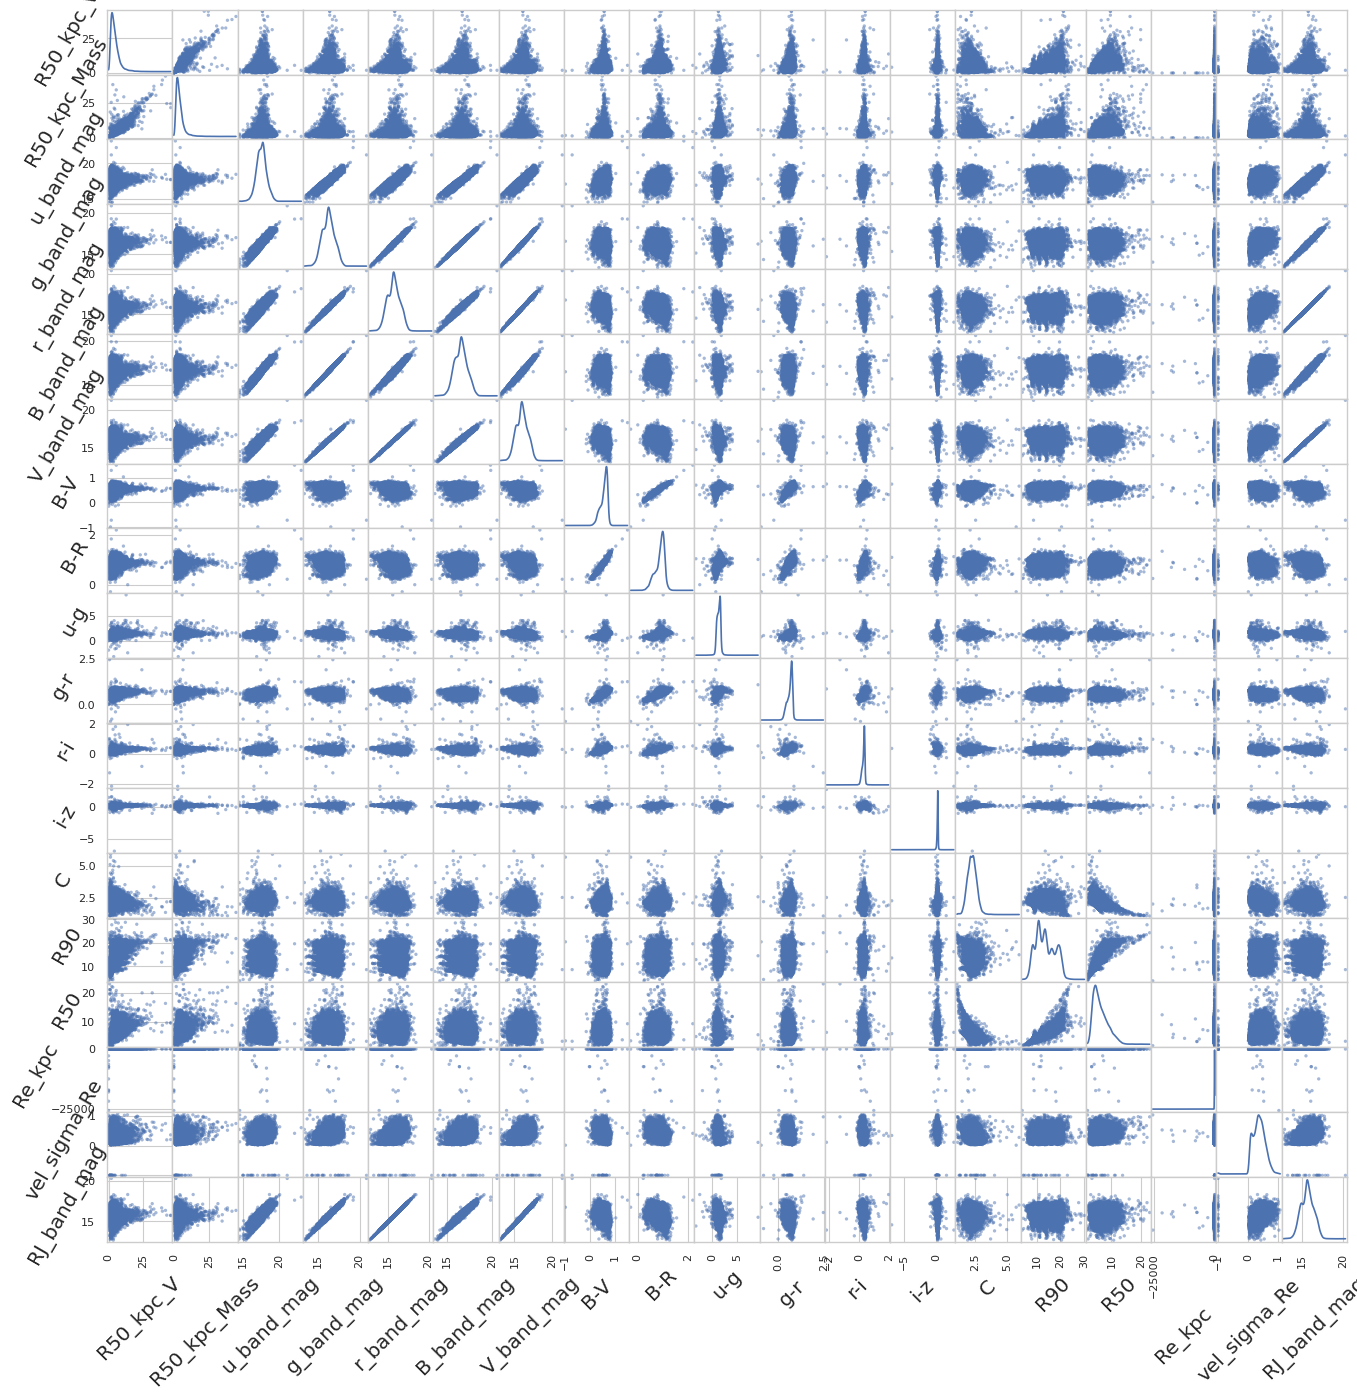

In [ ]:
#Creating a scatter matrix of interested features for relationshiop overview
test = df.iloc[:, -1]
features = df.iloc[:, :-1]

matrix = scatter_matrix(features, figsize=(16, 16), diagonal='kde')

#Rotating the labels of the data columns
for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45)
    ax.set_ylabel(ax.get_ylabel(), rotation=60)

# plt.tight_layout()
plt.show()


In [ ]:
#Scaling the data for easier manipulation 
df_test = df.iloc[:, -1]
df_features = df.iloc[:, :-1]

scaler = StandardScaler()
scaler.fit(df_features)

scaled_data = scaler.transform(df_features)
print("Scaled Data:\n", scaled_data)

#Converting back to df
df_scaled = pd.DataFrame(scaled_data, columns=df_features.columns)

print(df_scaled)


Scaled Data:
 [[-0.21490941  0.10743088 -0.05089995 ...  0.02745337  2.04531284
   0.85064159]
 [ 0.48878959  0.4236442   1.30425303 ...  0.03075667  2.05024555
   1.54736549]
 [ 0.58594082  0.23909279  0.58787729 ...  0.0313314   0.63399907
   0.68645274]
 ...
 [-0.1621409  -0.22678871 -1.65716825 ...  0.02785638  0.94334242
  -1.160815  ]
 [ 1.67119781  2.00086404  0.67605788 ...  0.04102508 -0.86750606
   0.61752134]
 [-0.52418601 -0.42661756 -1.54893293 ...  0.02637721  1.80333555
   0.24895824]]
       R50_kpc_V  R50_kpc_Mass  u_band_mag  g_band_mag  r_band_mag  \
0      -0.214909      0.107431   -0.050900    0.621165    0.825648   
1       0.488790      0.423644    1.304253    1.528446    1.540903   
2       0.585941      0.239093    0.587877    0.738350    0.694571   
3      -0.246873     -0.339259   -0.002946   -0.003970   -0.178736   
4       0.350880      0.036961   -0.536673    0.026922    0.177143   
...          ...           ...         ...         ...         ...   
1021

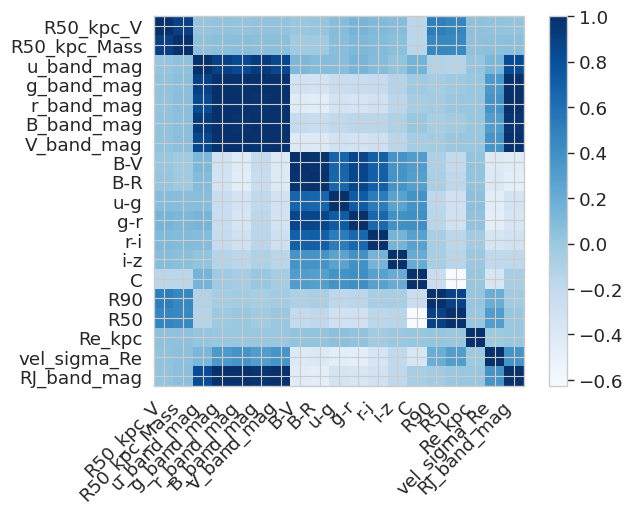

In [10]:
#Plotting a correlation matrix to check on feature correlations
df_mat = df_scaled.apply(pd.to_numeric, errors='coerce')
matrix = df_mat.corr(min_periods=1)
plt.imshow(matrix, cmap='Blues')
plt.colorbar()

#Extracting variable names 
variables = []
for i in matrix.columns:
    variables.append(i)

plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.show()

### Dimensionality reduction

['pca0' 'pca1' 'pca2']


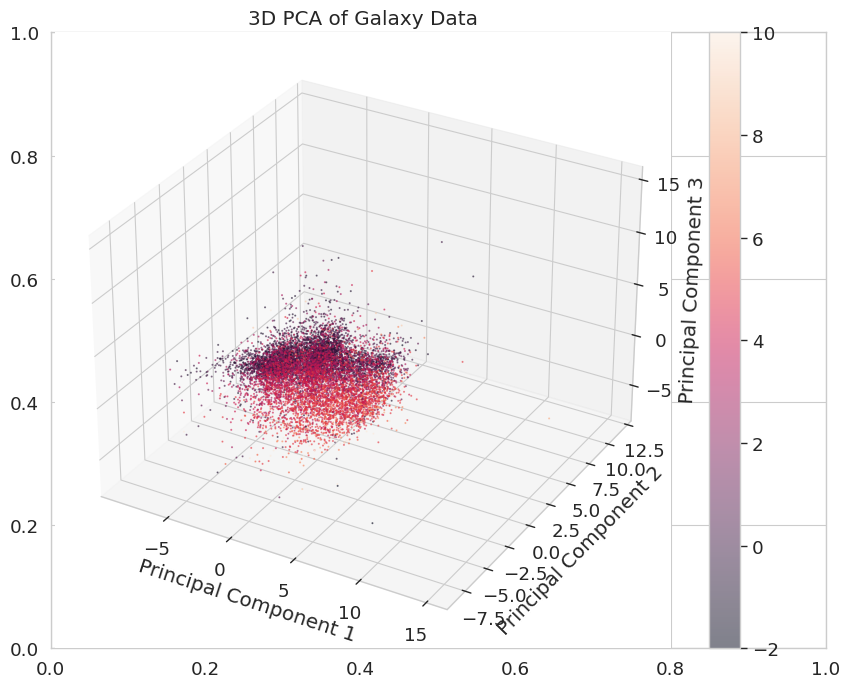

In [11]:
#PCA DR
pca = PCA(n_components=3, svd_solver='auto')
X_pca = pca.fit_transform(df_scaled)
print(pca.get_feature_names_out())

#Plotting the results in 3D
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=df_test, s = 0.5, alpha=0.5)
plt.colorbar(scatter, ax=ax)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Galaxy Data')
plt.show()

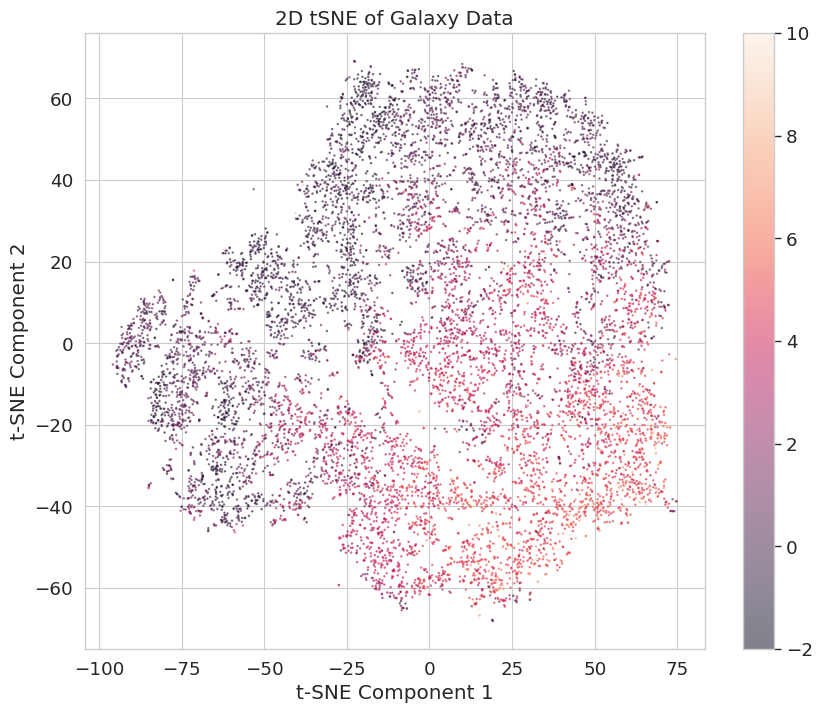

In [12]:
# t-SNE DR
tsne = TSNE(n_components=2, perplexity=50, learning_rate=800)
X_tsne = tsne.fit_transform(df_scaled)


#Plotting
fig,ax = plt.subplots(1,1, figsize=(10, 8))

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_test, s=1, alpha=0.5)
plt.colorbar(scatter, ax=ax)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D tSNE of Galaxy Data')

plt.show()

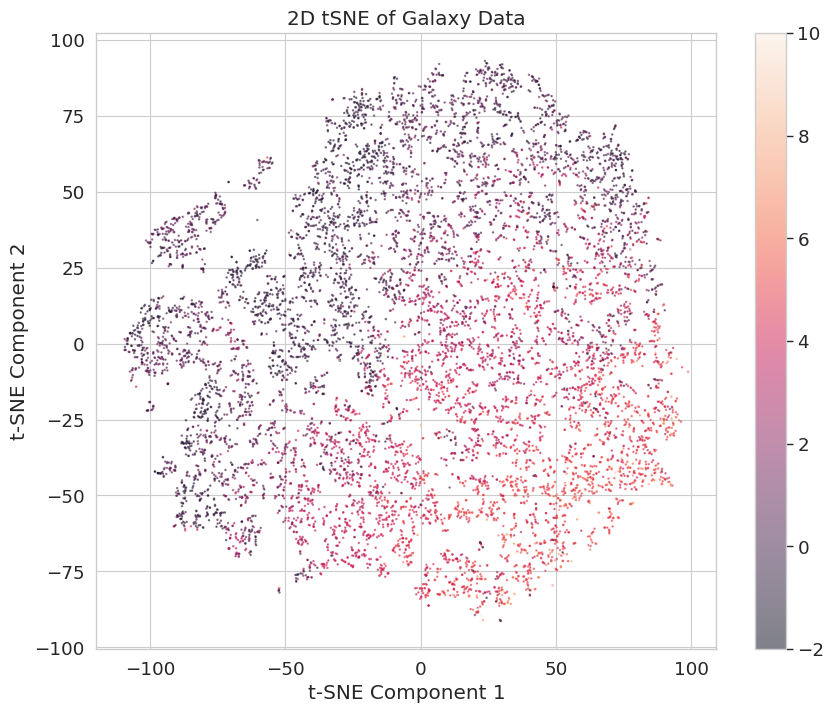

In [13]:
# t-SNE DR : lower perplexity
tsne2 = TSNE(n_components=2, perplexity=20, learning_rate=800)
X_tsne2 = tsne2.fit_transform(df_scaled)


#Plotting
fig,ax = plt.subplots(1,1, figsize=(10, 8))

scatter = ax.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=df_test, s=1, alpha=0.5)
plt.colorbar(scatter, ax=ax)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D tSNE of Galaxy Data')

plt.show()

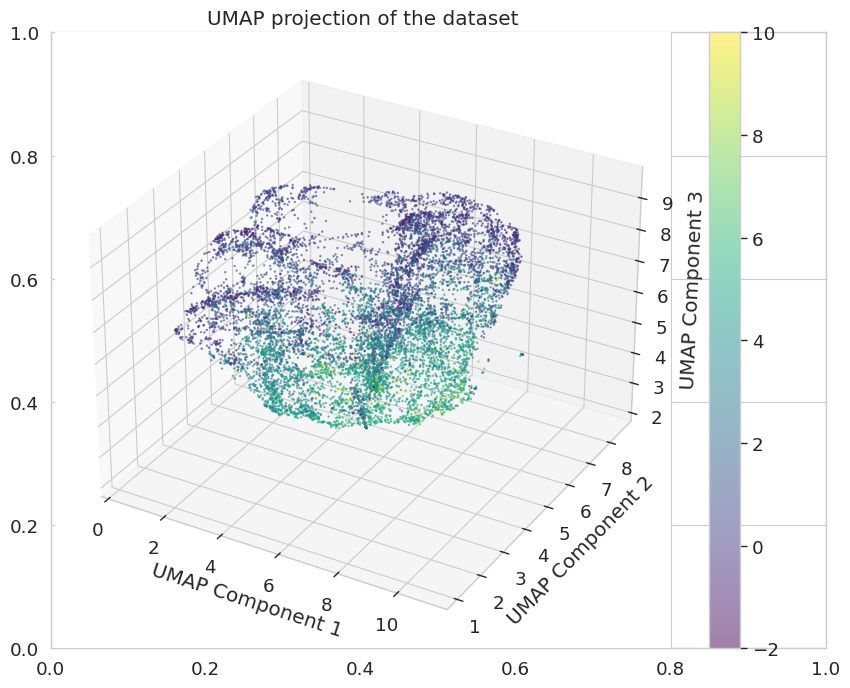

In [14]:
#UMAP DR
umap_model = umap.UMAP(n_components=3)
X_umap = umap_model.fit_transform(df_scaled)

#Plotting
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter2 = ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=df_test, cmap='viridis', s=1, alpha=0.5)
plt.colorbar(scatter2, ax=ax)
plt.title('UMAP projection of the dataset')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
plt.show()

### Clustering


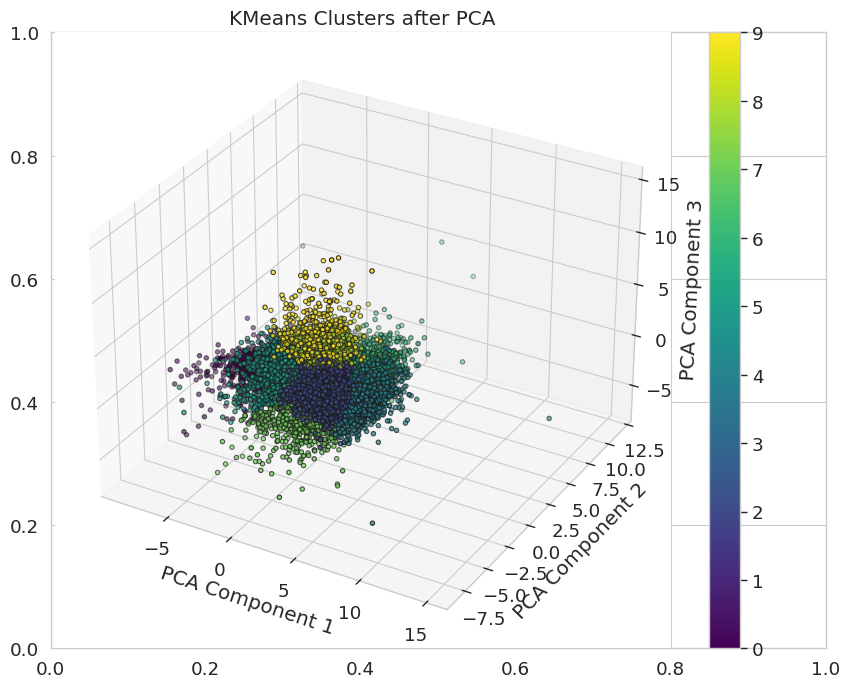

In [15]:
#Kmeans on PCA clustering
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(X_pca)

#Plotting in 3D
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],  X_pca[:,2], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=10)
scatter2 = ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red', marker='X')
plt.colorbar(scatter, ax=ax)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('KMeans Clusters after PCA')
plt.show()

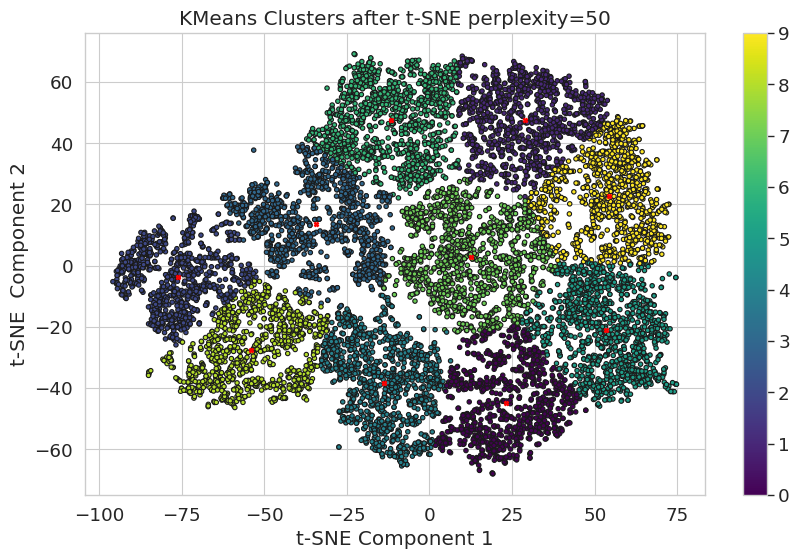

In [16]:
#Kmeans on tSNE
kmeans2 = KMeans(n_clusters=10)
clusters2 = kmeans2.fit_predict(X_tsne)

#Plotting
plt.figure(figsize=(10, 6))
scat = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters2, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=10, c='red', marker='X')
plt.colorbar(scat)
plt.title('KMeans Clusters after t-SNE perplexity=50')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE  Component 2')
plt.show()

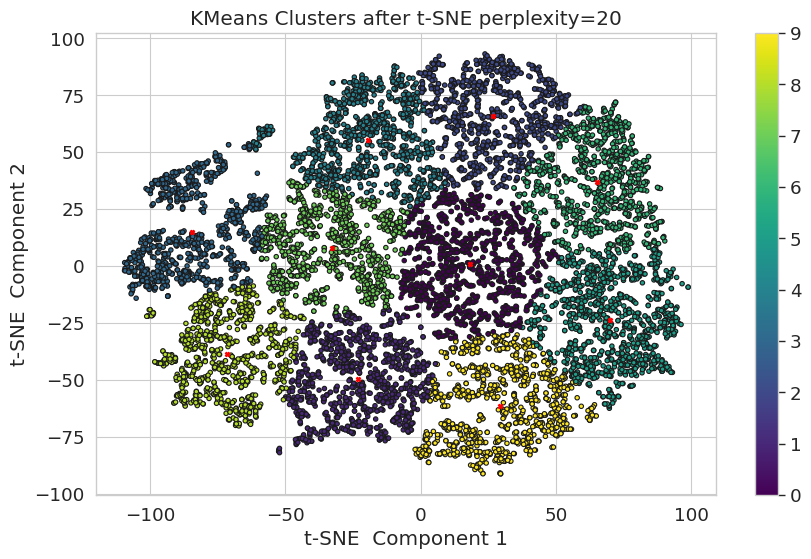

In [17]:
#Kmeans on tSNE (lower perplexity)
kmeans3 = KMeans(n_clusters=10)
clusters3 = kmeans3.fit_predict(X_tsne2)

#Plotting
plt.figure(figsize=(10, 6))
scat2 = plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=clusters3, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=10, c='red', marker='X')
plt.colorbar(scat2)
plt.title('KMeans Clusters after t-SNE perplexity=20')
plt.xlabel('t-SNE  Component 1')
plt.ylabel('t-SNE  Component 2')
plt.show()

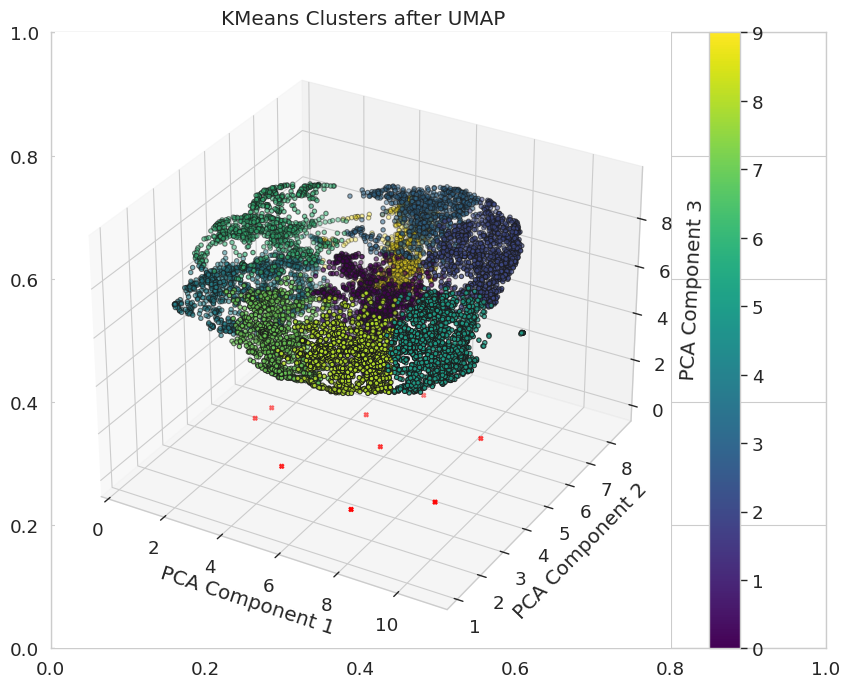

In [18]:
#KMeans on UMAP
kmeans4 = KMeans(n_clusters=10)
clusters4 = kmeans4.fit_predict(X_umap)

#Plotting in 3D
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter4 = ax.scatter(X_umap[:, 0], X_umap[:, 1],  X_umap[:,2], c=clusters4, cmap='viridis', marker='o', edgecolor='k', s=10)
scatter5 = ax.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=10, c='red', marker='X')
plt.colorbar(scatter4, ax=ax)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('KMeans Clusters after UMAP')
plt.show()

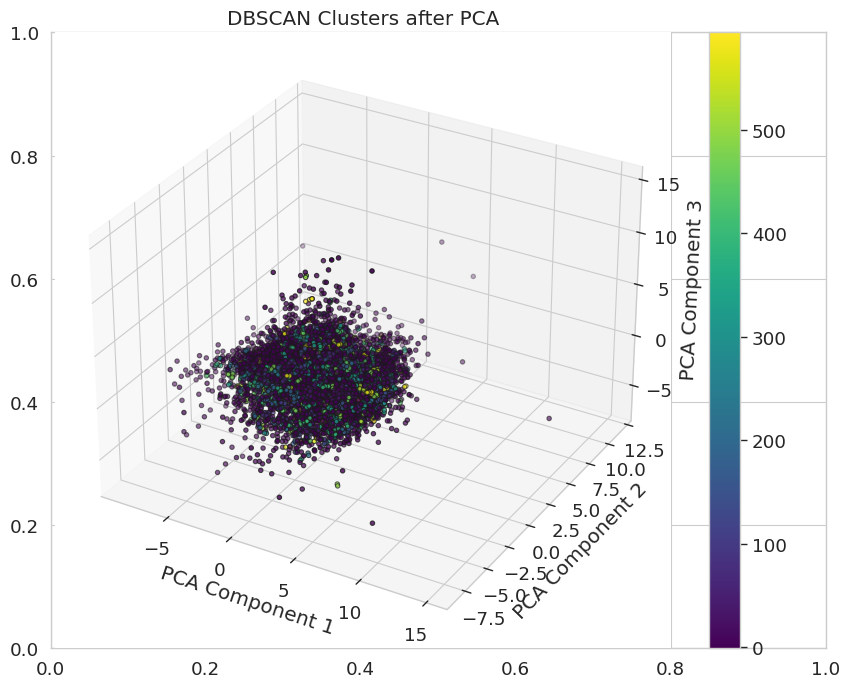

In [19]:
#DBSCAN on PCA
dbs = DBSCAN(min_samples=2, eps=0.3)
clust = dbs.fit_predict(X_pca)

#Plotting in 3D
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],  X_pca[:,2], c=clust, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.colorbar(scatter, ax=ax)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('DBSCAN Clusters after PCA')
plt.show()

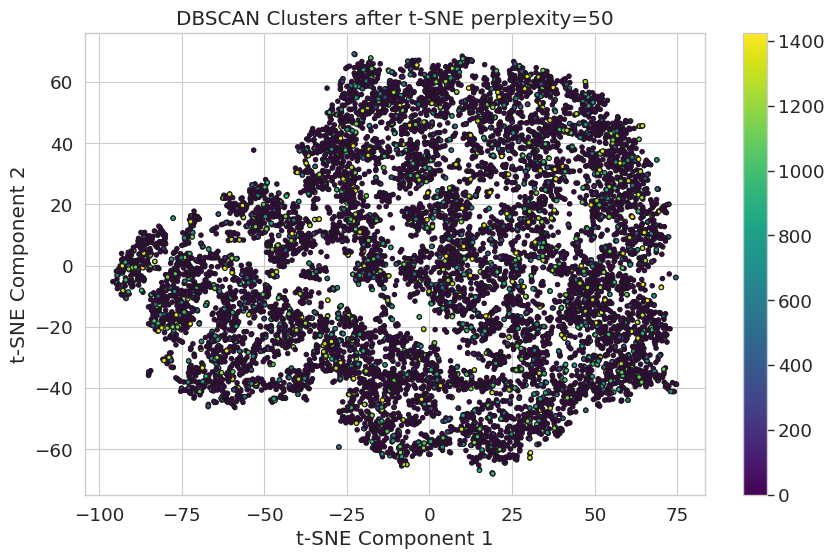

In [20]:
#DBSCAN on tSNE
dbs2 = DBSCAN(min_samples=2, eps=0.3)
clust2 = dbs2.fit_predict(X_tsne)

#Plotting
plt.figure(figsize=(10, 6))

scat3 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clust2, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.colorbar(scat3)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clusters after t-SNE perplexity=50')
plt.show()


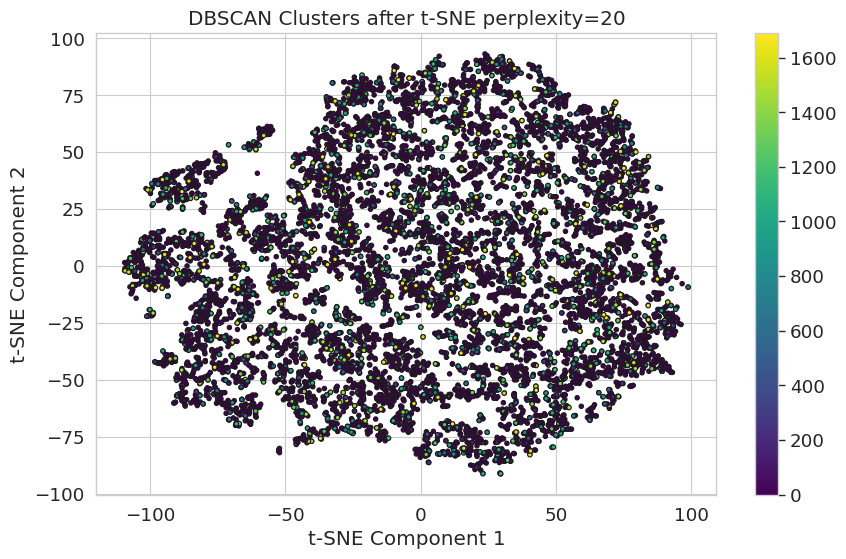

In [21]:
#DBSCAN on tSNE (lower perplexity)
dbs3 = DBSCAN(min_samples=2, eps=0.3)
clust3 = dbs3.fit_predict(X_tsne2)

#Plotting
plt.figure(figsize=(10, 6))

scat4 = plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=clust3, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.colorbar(scat4)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('DBSCAN Clusters after t-SNE perplexity=20')
plt.show()


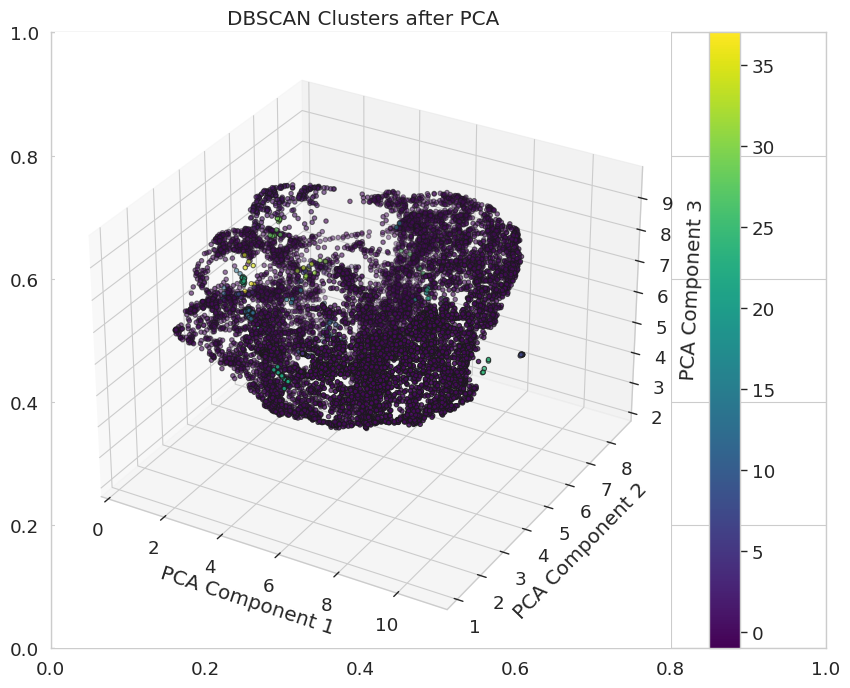

In [22]:
#DBSCAN on UMAP
dbs4 = DBSCAN(min_samples=2, eps=0.3)
clust4 = dbs4.fit_predict(X_umap)

#Plotting in 3D
fig,ax = plt.subplots(1,1, figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

scat5 = ax.scatter(X_umap[:, 0], X_umap[:, 1],  X_umap[:,2], c=clust4, cmap='viridis', marker='o', edgecolor='k', s=10)
plt.colorbar(scat5, ax=ax)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('DBSCAN Clusters after PCA')
plt.show()

### Performance

In [23]:
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score
from collections import Counter

#Performance PCA
homogeneity = homogeneity_score(df_test, clusters)
completeness = completeness_score(df_test, clusters)
silhouette = silhouette_score(X_pca, clusters)

print(f'Homogeneity Score Kmeans on PCA: {homogeneity}')
print(f'Completeness Score Kmeans on PCA: {completeness}')
print(f'Silhouette Score Kmeans on PCA: {silhouette}')

# Determine contaminants in each cluster
contaminants = {}
for cluster_id in np.unique(clusters):
    if cluster_id == -1:  
        continue
    cluster_points = df_test[clusters == cluster_id]
    most_common_class, count = Counter(cluster_points).most_common(1)[0]
    contaminants[cluster_id] = len(cluster_points) - count

print(f'Contaminants in each cluster for Kmeans on PCA: {contaminants}')

Homogeneity Score Kmeans on PCA: 0.23781489073999387
Completeness Score Kmeans on PCA: 0.20960145295767668
Silhouette Score Kmeans on PCA: 0.281669773607412
Contaminants in each cluster for Kmeans on PCA: {0: 1029, 1: 451, 2: 314, 3: 1088, 4: 528, 5: 496, 6: 734, 7: 274, 8: 851, 9: 205}


In [24]:
#Performance DBSCAN
homogeneity = homogeneity_score(df_test, clust)
completeness = completeness_score(df_test, clust)
silhouette = silhouette_score(X_pca, clust)

print(f'Homogeneity Score DBSCAN on PCA: {homogeneity}')
print(f'Completeness Score DBSCAN on PCA: {completeness}')
print(f'Silhouette Score DBSCAN on PCA: {silhouette}')

#Contaminants in each cluster
contaminants = {}
for cluster_id in np.unique(clust):
    if cluster_id == -1:  
        continue
    cluster_points = df_test[clust == cluster_id]
    most_common_class, count = Counter(cluster_points).most_common(1)[0]
    contaminants[cluster_id] = len(cluster_points) - count

print(f'Contaminants in each cluster for DBSCAN on PCA: {contaminants}')

Homogeneity Score DBSCAN on PCA: 0.24688901232080815
Completeness Score DBSCAN on PCA: 0.18252370702030613
Silhouette Score DBSCAN on PCA: -0.48314315313963707
Contaminants in each cluster for DBSCAN on PCA: {0: 143, 1: 1, 2: 3768, 3: 9, 4: 1, 5: 5, 6: 3, 7: 1, 8: 2, 9: 1, 10: 1, 11: 1, 12: 1, 13: 4, 14: 6, 15: 6, 16: 0, 17: 48, 18: 2, 19: 1, 20: 3, 21: 12, 22: 2, 23: 1, 24: 4, 25: 1, 26: 3, 27: 1, 28: 6, 29: 1, 30: 1, 31: 24, 32: 3, 33: 1, 34: 2, 35: 3, 36: 10, 37: 2, 38: 3, 39: 4, 40: 3, 41: 2, 42: 2, 43: 1, 44: 1, 45: 14, 46: 7, 47: 3, 48: 3, 49: 4, 50: 0, 51: 1, 52: 4, 53: 6, 54: 1, 55: 0, 56: 11, 57: 5, 58: 5, 59: 7, 60: 5, 61: 1, 62: 7, 63: 0, 64: 3, 65: 1, 66: 1, 67: 3, 68: 0, 69: 8, 70: 0, 71: 2, 72: 6, 73: 3, 74: 5, 75: 3, 76: 2, 77: 1, 78: 1, 79: 1, 80: 1, 81: 2, 82: 3, 83: 2, 84: 1, 85: 5, 86: 2, 87: 2, 88: 9, 89: 0, 90: 0, 91: 0, 92: 2, 93: 1, 94: 1, 95: 0, 96: 1, 97: 5, 98: 0, 99: 2, 100: 2, 101: 1, 102: 3, 103: 0, 104: 0, 105: 3, 106: 0, 107: 0, 108: 1, 109: 1, 110: 2, 11